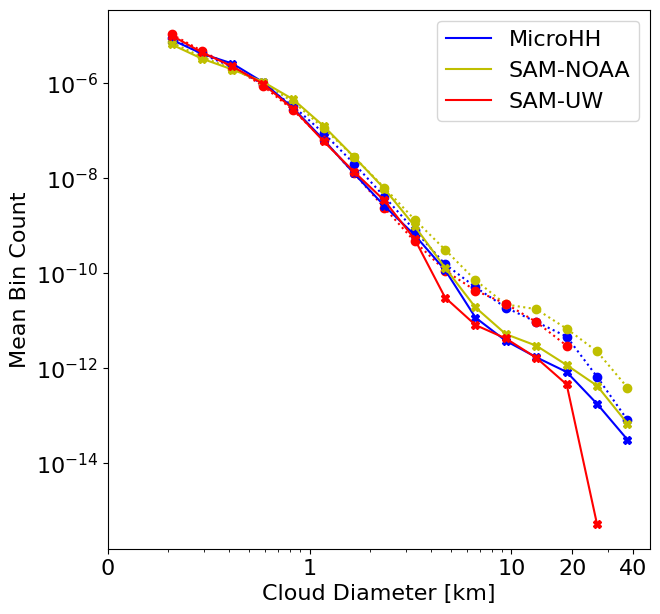

Text(0.5, 0, 'Time [h]')

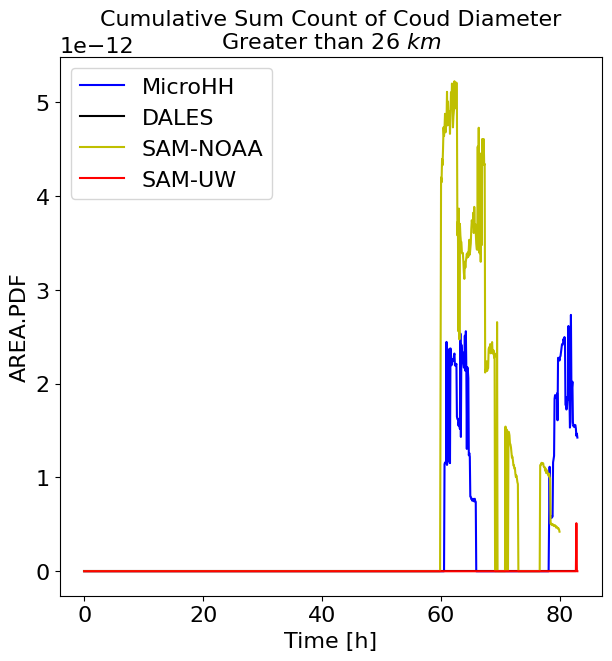

In [31]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
pl.rcParams['xtick.labelsize'] = 16
pl.rcParams['ytick.labelsize'] = 16
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 16

MHH=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_cloud_pdfs/microhh.Feb_2nd.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
new_coords = xr.DataArray(((MHH['AREA']*4/(np.pi*1e6))**(1/2)).values, dims='AREA'); MHH=MHH.assign_coords({'AREA':new_coords})
#MONC=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_cloud_pdfs/d20200202_diagnostic_2d.LWP.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=True)
SAM_NOAA=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_cloud_pdfs/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001_eurec4a_20200202.kpt_2D_0300s_select_vars.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
new_coords = xr.DataArray(((SAM_NOAA['AREA']*4/(np.pi*1e6))**(1/2)).values, dims='AREA'); SAM_NOAA=SAM_NOAA.assign_coords({'AREA':new_coords})
SAM_UW=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_cloud_pdfs/EUREC4A_2Feb_1024sqx151_150m_M2005_RRTM_Lagtraj_NC400_km_1024.2Dbin_1.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
new_coords = xr.DataArray(((SAM_UW['AREA']*4/(np.pi*1e6))**(1/2)).values, dims='AREA'); SAM_UW=SAM_UW.assign_coords({'AREA':new_coords})
DALES=xr.open_dataset('/fs/ess/PFS0220/eurec4a/DALES_cloud_pdfs/DALES_Feb2.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
new_coords = xr.DataArray(((DALES['AREA']*4/(np.pi*1e6))**(1/2)).values, dims='AREA'); DALES=DALES.assign_coords({'AREA':new_coords})

plot_var='AREA.PDF'
hr_cutoff=56
hr_cutoff_high=68

fig, ax=pl.subplots(figsize=(7,7))
MHH['AREA.COUNT.SECTIONMEAN']=(MHH[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time']))

DALES['AREA.COUNT.SECTIONMEAN']=DALES[plot_var].isel(time=slice(hr_cutoff*4,hr_cutoff_high*4)).mean(dim=['time'])
SAM_NOAA['AREA.COUNT.SECTIONMEAN']=SAM_NOAA[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])
SAM_UW['AREA.COUNT.SECTIONMEAN']=SAM_UW[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])
MHH['AREA.COUNT.SECTIONMEAN'].where(MHH['AREA.COUNT.SECTIONMEAN']>0).plot.line('b:')
MHH['AREA.COUNT.SECTIONMEAN'].where(MHH['AREA.COUNT.SECTIONMEAN']>0).plot.line('bo')
#DALES['AREA.COUNT.SECTIONMEAN'].where(DALES['AREA.COUNT.SECTIONMEAN']>0).plot.line('k:')
#DALES['AREA.COUNT.SECTIONMEAN'].where(DALES['AREA.COUNT.SECTIONMEAN']>0).plot.line('ko')
SAM_NOAA['AREA.COUNT.SECTIONMEAN'].where(SAM_NOAA['AREA.COUNT.SECTIONMEAN']>0).plot.line('y:')
SAM_NOAA['AREA.COUNT.SECTIONMEAN'].where(SAM_NOAA['AREA.COUNT.SECTIONMEAN']>0).plot.line('yo')
SAM_UW['AREA.COUNT.SECTIONMEAN'].where(SAM_UW['AREA.COUNT.SECTIONMEAN']>0).plot.line('r:')
SAM_UW['AREA.COUNT.SECTIONMEAN'].where(SAM_UW['AREA.COUNT.SECTIONMEAN']>0).plot.line('ro')

MHH['AREA.COUNT.MEAN']=MHH[plot_var].mean(dim=['time'])
DALES['AREA.COUNT.MEAN']=DALES[plot_var].mean(dim=['time'])
SAM_NOAA['AREA.COUNT.MEAN']=SAM_NOAA[plot_var].mean(dim=['time'])
SAM_UW['AREA.COUNT.MEAN']=SAM_UW[plot_var].mean(dim=['time'])
MHH['AREA.COUNT.MEAN'].where(MHH['AREA.COUNT.MEAN']>0).plot.line('b-',label='MicroHH')
MHH['AREA.COUNT.MEAN'].where(MHH['AREA.COUNT.MEAN']>0).plot.line('bX')
#DALES['AREA.COUNT.MEAN'].where(DALES['AREA.COUNT.MEAN']>0).plot.line('k-',label='DALES')
#DALES['AREA.COUNT.MEAN'].where(DALES['AREA.COUNT.MEAN']>0).plot.line('kX')
SAM_NOAA['AREA.COUNT.MEAN'].where(SAM_NOAA['AREA.COUNT.MEAN']>0).plot.line('y-',label='SAM-NOAA')
SAM_NOAA['AREA.COUNT.MEAN'].where(SAM_NOAA['AREA.COUNT.MEAN']>0).plot.line('yX')
SAM_UW['AREA.COUNT.MEAN'].where(SAM_UW['AREA.COUNT.MEAN']>0).plot.line('r-',label='SAM-UW')
SAM_UW['AREA.COUNT.MEAN'].where(SAM_UW['AREA.COUNT.MEAN']>0).plot.line('rX')

pl.legend()
pl.yscale('log')
pl.xlabel('Cloud Diameter [km]')
pl.ylabel('Mean Bin Count')
pl.xscale('log')
#ax.xaxis.set_major_locator(pl.LogLocator(base=10, numticks=3))
ax.set_xticks([0.1,1,10,20,40])
ax.xaxis.set_major_formatter(pl.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
pl.show()
#pl.title(r"Mean Cloud Area Count" +"\n"+ f"(Overall Mean and Mean after {hr_cutoff} hours)")

cut_off=14

MHH['time']=MHH['time']/3600
DALES['time']=DALES['time']/3600
SAM_NOAA['time']=(SAM_NOAA['time']-SAM_NOAA['time'].values[0])*24
SAM_UW['time']=(SAM_UW['time']-SAM_UW['time'].values[0])*24

figure=pl.figure(figsize=(7,7))
#MHH[plot_var]=MHH[plot_var].rolling(time=12).mean();SAM_NOAA[plot_var]=SAM_NOAA[plot_var].rolling(time=12).mean();SAM_UW[plot_var]=SAM_UW[plot_var].rolling(time=12).mean();DALES[plot_var]=DALES[plot_var].rolling(time=4).mean();
MHH[plot_var].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).plot.line('b-',label='MicroHH')
DALES[plot_var].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).plot.line('k-',label='DALES')
SAM_NOAA[plot_var].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).plot.line('y-',label='SAM-NOAA')
SAM_UW[plot_var].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).plot.line('r-',label='SAM-UW')
pl.legend()
pl.title(f'Cumulative Sum Count of Coud Diameter'+"\n"+ f'Greater than {int(MHH["AREA"].isel(AREA=cut_off))} $km$')
pl.xlabel('Time [h]')



In [10]:
#### Field Plots #####
import os
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm
import math
from scipy.stats import norm
import seaborn as sns
import xarray as xr
import netCDF4 as nc
import sys

sys.setrecursionlimit(1000000)

##########################################################################################
class cell:
    def __init__(self, id):
        self.id = id
        self.value = [[],[]]
        self.location = [[],[]]
        self.nelements = 0
        self.nelements_local = 0

    def add_elements(self, i, j, var_values):
        self.location[0].append(i)
        self.location[1].append(j)
        self.value[0].append(var_values)
        self.nelements = self.nelements + 1
        self.nelements_local = self.nelements_local + 1
    def __del__(self):
        return
##########################################################################################
def find_boolean(variable, threshold_criteria): #variable is f(i, j, t): --> outputs boolean -1 (unsatisfied) 0 (satisfied) 
    boolean = np.zeros(( len(variable[:,0]), len(variable[0,:])))
    boolean = -1
    boolean = np.where(variable[:,:]>threshold_criteria,0,-1)
    return boolean;
########################################################################################
def identify_elements_in_cell(i,j,new_cell):  #input the ijk at which boolean is satisfied along with boolean and new cell created 

    global booli;
    new_cell.add_elements(i,j,cell_variable[i,j])
    booli[i,j] = -1

    ii=i-1; jj=j; #look west
    if ii<0:
       ii = nx-1
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i+1; jj=j;  #look east
    if ii>nx-1:
       ii = 0
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i; jj=j+1;  #look north
    if jj>ny-1:
        jj = 0
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i; jj=j-1;  #look south
    if jj<0:
       jj = ny-1
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell) 
#################################################################################################
def create_new_cell(variable,bool):                                # input the boolean and the variable, output is the cells tracked (i,j,t) based on boolean 
    cell_number = 0;
    global booli,cell_variable,nx,ny;
    nx = len(variable[:,0])
    ny = len(variable[0,:])
    booli=bool;cell_variable = variable;
    variable_cells = []
    for j in range(0,ny):
        for i in range(0,nx):
            if booli[i,j]==0: 
                new_cell=cell(cell_number) 
                identify_elements_in_cell(i,j,new_cell)
                if new_cell.nelements>=nminelems:
                    variable_cells.append(new_cell)
                    variable_cells[cell_number].id = cell_number
                    cell_number = cell_number + 1
                else:
                    del new_cell;
    return variable_cells, cell_number;
#################################################################################################
def run_tracking(tracked_variable,param_threshold):
    global nx,ny;
    nx = len(tracked_variable[:,0]); ny = len(tracked_variable[0,:]); 
    bool = find_boolean(tracked_variable,param_threshold)
    [cells,cell_number] = create_new_cell(tracked_variable,bool);
    return cells,cell_number;
####################################################################################################
def find_cell_centers(cells,ncells):
    centers=np.zeros((ncells,2))
    max_cloudsize=0;
    for i in range(0,ncells):
        centers[i,0]=np.mean(cells[i].location[0])
        centers[i,1]=np.mean(cells[i].location[1])
        if cells[i].nelements>max_cloudsize:
            max_cloudsize=cells[i].nelements
    return centers,max_cloudsize;
####################################################################################################
def find_nearest_neighbor(centers,nx,ny):
    distance=np.zeros(len(centers[:,0]))
    nn_distance=np.zeros(len(centers[:,0]))
    for i in range(len(centers[:,0])):
        for j in range(len(centers[:,0])):
            if i==j:
                distance[j]=100;
            else:
                xdist=min(abs(centers[i,0]+nx-centers[j,0]),abs(centers[i,0]-nx-centers[j,0]),abs(centers[i,0]-centers[j,0]))
                ydist=min(abs(centers[i,1]+ny-centers[j,1]),abs(centers[i,1]-ny-centers[j,1]),abs(centers[i,1]-centers[j,1]))
                distance[j]=math.sqrt(xdist**2+ydist**2)
        nn_distance[i]=min(distance)
    return nn_distance;
####################################################################################################
def retrieve_variable(variable_name,netcdf_path): #open corresponding netcdf file and read data
    all_data=xr.open_dataset(netcdf_path,decode_times=False)
    var=all_data[variable_name].values
    variable=var
    x=all_data['x'].values
    y=all_data['y'].values
    t=all_data['time'].values
    return variable, x, y, t;    
##########################################################################################
#[w_cross,x,y,t]=retrieve_variable(variable_name='w',netcdf_path='/fs/ess/PFS0220/eurec4a/case_1060lagtraj_feb2_withw/w_cross.nc')
def get_iorg(xr_data,variable_name,param_threshold,start_ind,slice_len):
    variable=xr_data[variable_name].values
    i_org=np.zeros(xr_data.time.size)
    Max_Clouds=np.zeros(xr_data.time.size)
    for i in range(start_ind,xr_data.time.size,slice_len):
        if i%60==0:
            print(i)
        [clouds,ncells]=run_tracking(tracked_variable=variable[i,:,:],param_threshold=param_threshold)
        if ncells<2:
            i_org[i]=0;
            Max_Clouds[i]=0;
        else:
            [centers,Max_Clouds[i]]=find_cell_centers(clouds,ncells)
            nn_distance=find_nearest_neighbor(centers,nx,ny)
            centers=centers.astype(int)
            nn_sorted = np.sort(nn_distance);nn_sorted=nn_sorted/max(nn_sorted)
            p = 1. * np.arange(len(nn_distance)) / (len(nn_distance) - 1)
            p_ran=1-np.exp(-1*(math.pi)*nn_sorted*nn_sorted)
            i_org[i]=np.trapz(p,x=p_ran)
    xr_data['i_org']=xr.DataArray(i_org,dims=['time'])
    xr_data['Max_Clouds']=xr.DataArray(Max_Clouds,dims=['time'])
    return xr_data;
#########################################################################################

sim='Feb9'
nminelems=10
start_hr=40
slice_len=12;

if sim=='Feb2':
    nc_path='/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/ql_path.xy.nc'
    ds=xr.open_dataset(nc_path,decode_times=False)
    ds['time'].attrs['units'] = 's since 2020-01-31 00:00:00';ds['time'].attrs['calendar'] = 'proleptic_gregorian';ds['time'].attrs['axis'] = 'T'; 
elif sim=='Feb9':
    nc_path='/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_9th/ql_path.xy.nc'
    ds=xr.open_dataset(nc_path,decode_times=False)
    ds['time'].attrs['units'] = 's since 2020-02-06 00:00:00';ds['time'].attrs['calendar'] = 'proleptic_gregorian';ds['time'].attrs['axis'] = 'T'; 

ds=xr.decode_cf(ds);

if sim=='Feb2':
    ds2=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_results/Feb2/EUREC4A_2Feb_1024sqx151_150m_M2005_RRTM_Lagtraj_NC400_km_2D_1024_HOURLY_CONCAT.nc',decode_times=True)
    ds2['time']=(ds2['time']-ds2['time'].values[0])*86400;
    ds2['time'].attrs['units'] = 's since 2020-01-31 00:00:00';ds2['time'].attrs['calendar'] = 'proleptic_gregorian';ds2['time'].attrs['axis'] = 'T';
elif sim=='Feb9':
    ds2=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_results/Feb9/EUREC4A_9Feb_1024sqx151_150m_M2005_RRTM_Lagtraj_NC400_km_2D_1024_HOURLY_CONCAT.nc',decode_times=True)
    ds2['time']=(ds2['time']-ds2['time'].values[0])*86400;
    ds2['time'].attrs['units'] = 's since 2020-02-06 00:00:00';ds2['time'].attrs['calendar'] = 'proleptic_gregorian';ds2['time'].attrs['axis'] = 'T';
ds2=xr.decode_cf(ds2);

if sim=='Feb2':
    ds3=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_results/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001.hera.2023-12-23-01h08m58s/OUT_2D/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001_eurec4a_20200202.kpt_2D_0300s.nc',decode_times=True)
    ds3['time']=(ds3['time']-ds3['time'].values[0])*86400; 
    ds3['time'].attrs['units'] = 's since 2020-01-31 00:00:00';ds3['time'].attrs['calendar'] = 'proleptic_gregorian';ds3['time'].attrs['axis'] = 'T';
elif sim=='Feb9':
    ds3=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_results/NOAA_SAM_EUREC4A_2020-02-09_1024sqx151_150m_FY2M_RRTM_NA471.001.hera.2023-12-24-20h09m55s/OUT_2D/NOAA_SAM_EUREC4A_2020-02-09_1024sqx151_150m_FY2M_RRTM_NA471.001_eurec4a_20200209.kpt_2D_0300s.nc',decode_times=True)
    ds3['time']=(ds3['time']-ds3['time'].values[0])*86400; 
    ds3['time'].attrs['units'] = 's since 2020-02-06 00:00:00';ds3['time'].attrs['calendar'] = 'proleptic_gregorian';ds3['time'].attrs['axis'] = 'T';
ds3=xr.decode_cf(ds3);

if sim=='Feb2':
    ds5=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_results/d20200202_diagnostic_2d.nc',decode_times=True)
elif sim=='Feb9':
    ds5=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_results/d20200209_diagnostic_2d.nc',decode_times=True)
#ds4=xr.open_dataset('/fs/ess/PFS0220/eurec4a/DALES_Results/Feb2_1024x1024_150m/fieldint.lwp.001.nc',decode_times=False)

ds=get_iorg(ds,'ql_path',0.01,start_ind=int(start_hr*3600/300),slice_len=slice_len)
print('SAM UW')
ds2=get_iorg(ds2,'LWP',0.01,start_ind=int(start_hr*3600/3600),slice_len=int(slice_len/12))
print('SAM NOAA')
ds3=get_iorg(ds3,'CWP',0.01,start_ind=int(start_hr*3600/300),slice_len=slice_len)
print('DALES')
ds5=get_iorg(ds5,'lwp',0.01,start_ind=int(start_hr*3600/1800),slice_len=int(slice_len/12))


480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
SAM UW
60
SAM NOAA
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
DALES
120
180
240
300
360
420
480
540


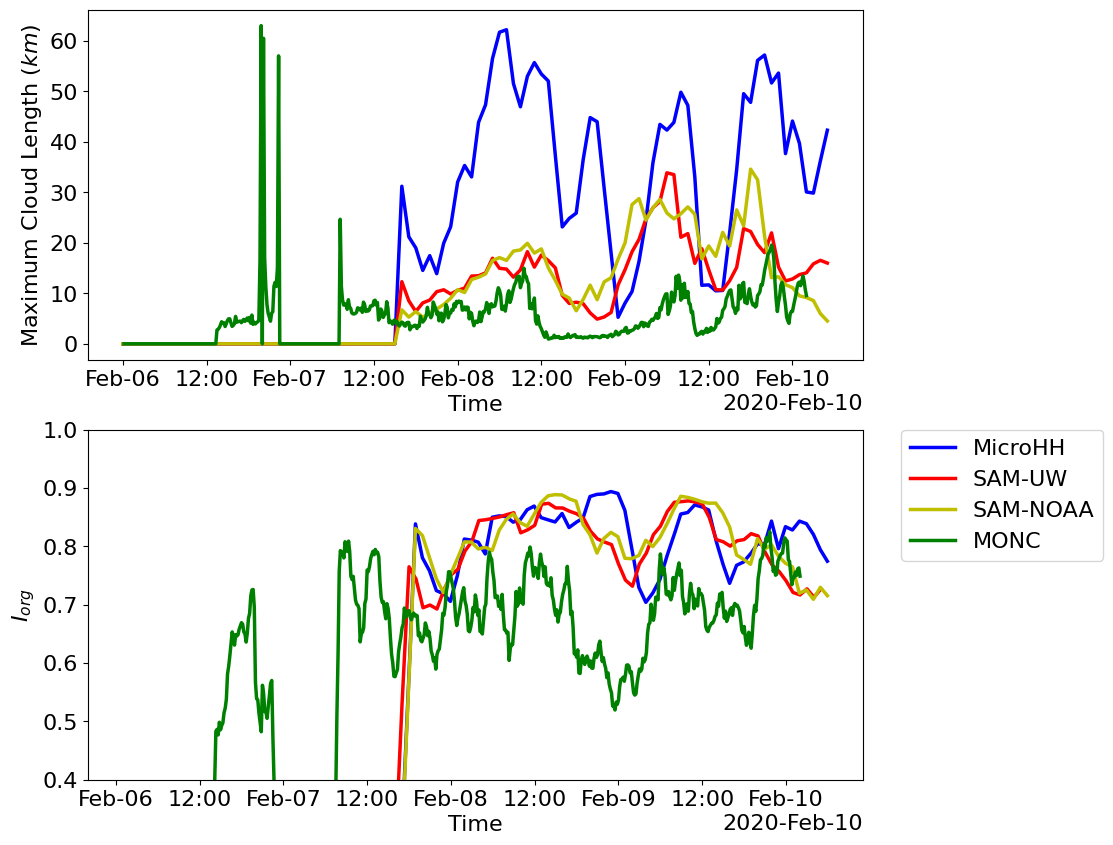

In [11]:
pl.rcParams['xtick.labelsize'] = 16
pl.rcParams['ytick.labelsize'] = 16
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 16

pl.subplots(figsize=(10,10))
pl.subplot(2,1,1)
(ds.Max_Clouds**(1/2)*0.15).isel(time=slice(None,None,slice_len)).plot.line('b-',lw=2.5,label='MicroHH')
(ds2.Max_Clouds**(1/2)*0.15).plot.line('r-',lw=2.5,label='SAM-UW')   
(ds3.Max_Clouds**(1/2)*0.15).isel(time=slice(None,None,slice_len)).plot.line('y-',lw=2.5,label='SAM-NOAA')
(ds5.Max_Clouds**(1/2)*0.15).plot.line('g-',lw=2.5,label='MONC')  
pl.xlabel('Time')
pl.ylabel(r'Maximum Cloud Length $(km)$')


ds['i_org_m']=ds['i_org'].rolling(time=slice_len).max()
ds['i_org_m']=ds['i_org_m'].rolling(time=slice_len*3).mean()
ds2['i_org_m']=ds2['i_org'].rolling(time=int(slice_len*3/12)).mean()
ds3['i_org_m']=ds3['i_org'].rolling(time=slice_len).max()
ds3['i_org_m']=ds3['i_org_m'].rolling(time=slice_len*3).mean()
ds5['i_org_m']=ds5['i_org'].rolling(time=int(slice_len*6/12)).mean()
pl.subplot(2,1,2)
(ds.i_org_m).plot.line('b-',lw=2.5,label='MicroHH')
(ds2.i_org_m).plot.line('r-',lw=2.5,label='SAM-UW')
(ds3.i_org_m).plot.line('y-',lw=2.5,label='SAM-NOAA')
(ds5.i_org_m).plot.line('g-',lw=2.5,label='MONC')
pl.xlabel('Time')
pl.ylabel(r'$I_{org}$')
pl.ylim(0.4,1)
pl.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
pl.savefig('/users/PFS0220/graghuna/Flower_MIP_Paper/Plots/maxcld_iorg_Feb9.png',bbox_inches='tight',dpi=300)

23592960000.0


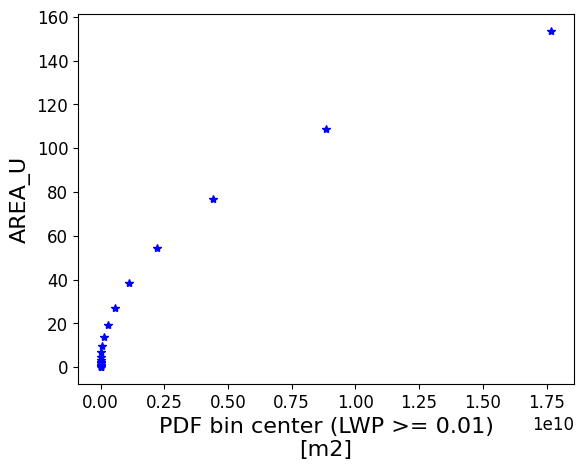

In [12]:
(((MHH.AREA_U)/1e6)**(1/2)).plot.line('b*',label='MicroHH')
print(MHH.AREA_U[19].values)

/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site

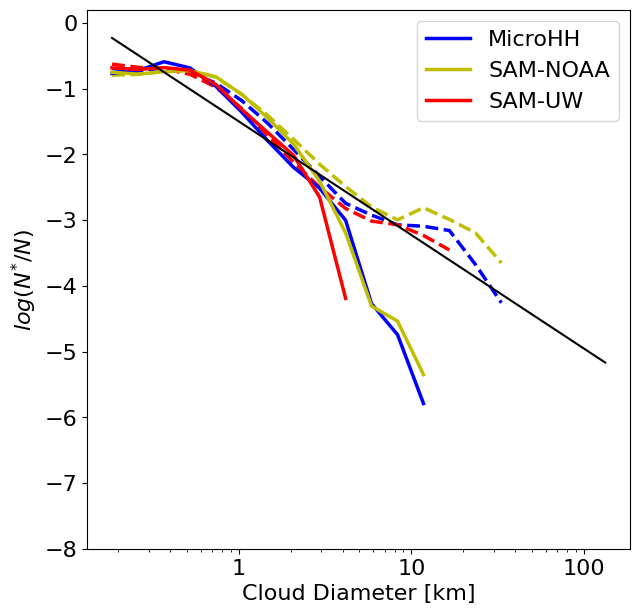

In [24]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
pl.rcParams['xtick.labelsize'] = 16
pl.rcParams['ytick.labelsize'] = 16
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 16
sim='Feb2'

if sim=='Feb2':
    MHH=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_cloud_pdfs/microhh.Feb_2nd.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
elif sim=='Feb9':
    MHH=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_cloud_pdfs/microhh.Feb_9th.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
new_coords = xr.DataArray(((MHH['AREA']/(1e6))**(1/2)).values, dims='AREA'); MHH=MHH.assign_coords({'AREA':new_coords})
#MONC=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_cloud_pdfs/d20200202_diagnostic_2d.LWP.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=True)
if sim=='Feb2':
    SAM_NOAA=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_cloud_pdfs/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001_eurec4a_20200202.kpt_2D_0300s_select_vars.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
elif sim=='Feb9':
    SAM_NOAA=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_cloud_pdfs/NOAA_SAM_EUREC4A_2020-02-09_1024sqx151_150m_FY2M_RRTM_NA471.001_eurec4a_20200209.kpt_2D_0300s_select_vars.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
new_coords = xr.DataArray(((SAM_NOAA['AREA']/(1e6))**(1/2)).values, dims='AREA'); SAM_NOAA=SAM_NOAA.assign_coords({'AREA':new_coords})
SAM_UW=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_cloud_pdfs/EUREC4A_2Feb_1024sqx151_150m_M2005_RRTM_Lagtraj_NC400_km_1024.2Dbin_1.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
new_coords = xr.DataArray(((SAM_UW['AREA']/(1e6))**(1/2)).values, dims='AREA'); SAM_UW=SAM_UW.assign_coords({'AREA':new_coords})
DALES=xr.open_dataset('/fs/ess/PFS0220/eurec4a/DALES_cloud_pdfs/DALES_Feb2.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
new_coords = xr.DataArray(((DALES['AREA']/(1e6))**(1/2)).values, dims='AREA'); DALES=DALES.assign_coords({'AREA':new_coords})

plot_var='AREA.COUNT'
hr_cutoff=56
hr_cutoff_high=68

fig, ax=pl.subplots(figsize=(7,7))
#np.log10((MHH[plot_var].mean(dim=['time']))*MHH['AREA']*np.log(10)/(MHH[plot_var].mean(dim=['time'])).sum(dim=['AREA'])).plot.line('b-',label='MicroHH')
#np.log10((SAM_NOAA[plot_var].mean(dim=['time']))*SAM_NOAA['AREA']*np.log(10)/(SAM_NOAA[plot_var].mean(dim=['time'])).sum(dim=['AREA'])).plot.line('y-',label='SAM-NOAA')
#np.log10((SAM_UW[plot_var].mean(dim=['time']))*SAM_UW['AREA']*np.log(10)/(SAM_UW[plot_var].mean(dim=['time'])).sum(dim=['AREA'])).plot.line('r-',label='SAM-UW')

np.log10((MHH[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).sum(dim=['time']))/\
    (MHH[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).sum(dim=['time'])).sum(dim=['AREA'])).plot.line('b--',lw=2.5)
np.log10((SAM_NOAA[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).sum(dim=['time']))/\
    (SAM_NOAA[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).sum(dim=['time'])).sum(dim=['AREA'])).plot.line('y--',lw=2.5)
np.log10((SAM_UW[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).sum(dim=['time']))/\
    (SAM_UW[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).sum(dim=['time'])).sum(dim=['AREA'])).plot.line('r--',lw=2.5)
#np.log10((MHH[plot_var].mean(dim=['time']))*MHH['AREA']*np.exp(1)/(MHH[plot_var].mean(dim=['time'])).sum(dim=['AREA'])).plot.line('bX')
#np.log10((SAM_NOAA[plot_var].mean(dim=['time']))*SAM_NOAA['AREA']*np.exp(1)/(SAM_NOAA[plot_var].mean(dim=['time'])).sum(dim=['AREA'])).plot.line('yX')
#np.log10((SAM_UW[plot_var].mean(dim=['time']))*SAM_UW['AREA']*np.exp(1)/(SAM_UW[plot_var].mean(dim=['time'])).sum(dim=['AREA'])).plot.line('rX')
np.log10((MHH[plot_var].isel(time=slice(0,hr_cutoff*12)).sum(dim=['time']))/\
    (MHH[plot_var].isel(time=slice(0,hr_cutoff*12)).sum(dim=['time'])).sum(dim=['AREA'])).plot.line('b-',lw=2.5,label='MicroHH')
np.log10((SAM_NOAA[plot_var].isel(time=slice(0,hr_cutoff*12)).sum(dim=['time']))/\
    (SAM_NOAA[plot_var].isel(time=slice(0,hr_cutoff*12)).sum(dim=['time'])).sum(dim=['AREA'])).plot.line('y-',lw=2.5,label='SAM-NOAA')
np.log10((SAM_UW[plot_var].isel(time=slice(0,hr_cutoff*12)).sum(dim=['time']))/\
    (SAM_UW[plot_var].isel(time=slice(0,hr_cutoff*12)).sum(dim=['time'])).sum(dim=['AREA'])).plot.line('r-',lw=2.5,label='SAM-UW')




MHH['Linear']=np.log(MHH['AREA'])*(-0.75)-1.5
MHH['Linear'].plot.line('k-')

pl.legend()
pl.xlabel('Cloud Diameter [km]')
pl.ylabel(r'$log(N^{*}/N)$')
pl.xscale('log')
pl.ylim(-8,0.2)
#ax.set_yticks([0,-1,-2,-3,-4,-5,-6,-7,-8])
ax.xaxis.set_major_locator(pl.LogLocator(base=10))
ax.xaxis.set_major_formatter(pl.FuncFormatter(lambda x, _: '{:.16g}'.format(x)))
#pl.savefig('/users/PFS0220/graghuna/Flower_MIP_Paper/Plots/CloudDensity_Feb9.png',bbox_inches='tight',dpi=300)
#pl.title(r"Mean Cloud Area Count" +"\n"+ f"(Overall Mean and Mean after {hr_cutoff} hours)")

/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site

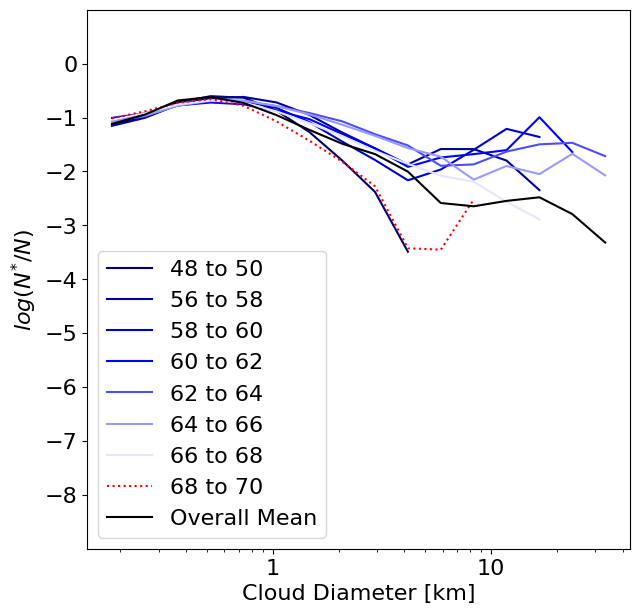

In [58]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

plot_var='AREA.COUNT'
plot_nc=MHH
fig, ax=pl.subplots(figsize=(7,7))
hr_cutoff=48;hr_cutoff_high=50
np.log10((plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time']))*plot_nc['AREA']*np.log(10)/\
    (plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])).sum(dim=['AREA'])).plot.line(color=lighten_color('b',1.6),label='48 to 50')
hr_cutoff=56;hr_cutoff_high=58
np.log10((plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time']))*plot_nc['AREA']*np.log(10)/\
    (plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])).sum(dim=['AREA'])).plot.line(color=lighten_color('b',1.4),label='56 to 58')
hr_cutoff=58;hr_cutoff_high=60
np.log10((plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time']))*plot_nc['AREA']*np.log(10)/\
    (plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])).sum(dim=['AREA'])).plot.line(color=lighten_color('b',1.2),label='58 to 60')
hr_cutoff=60;hr_cutoff_high=62
np.log10((plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time']))*plot_nc['AREA']*np.log(10)/\
    (plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])).sum(dim=['AREA'])).plot.line(color=lighten_color('b',1),label='60 to 62')
hr_cutoff=62;hr_cutoff_high=64
np.log10((plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time']))*plot_nc['AREA']*np.log(10)/\
    (plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])).sum(dim=['AREA'])).plot.line(color=lighten_color('b',0.7),label='62 to 64')
hr_cutoff=64;hr_cutoff_high=66
np.log10((plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time']))*plot_nc['AREA']*np.log(10)/\
    (plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])).sum(dim=['AREA'])).plot.line(color=lighten_color('b',0.4),label='64 to 66')
hr_cutoff=66;hr_cutoff_high=68
np.log10((plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time']))*plot_nc['AREA']*np.log(10)/\
    (plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])).sum(dim=['AREA'])).plot.line(color=lighten_color('b',0.1),label='66 to 68')
hr_cutoff=68;hr_cutoff_high=70
np.log10((plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time']))*plot_nc['AREA']*np.log(10)/\
    (plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])).sum(dim=['AREA'])).plot.line('r:',label='68 to 70')
hr_cutoff=0;hr_cutoff_high=80
np.log10((plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time']))*plot_nc['AREA']*np.log(10)/\
    (plot_nc[plot_var].isel(time=slice(hr_cutoff*12,hr_cutoff_high*12)).mean(dim=['time'])).sum(dim=['AREA'])).plot.line('k-',label='Overall Mean')


coeff=np.polyfit(np.log10(plot_nc['AREA'].values[0:15]),np.log10(plot_nc[plot_var].isel(time=slice(56*12,70*12)).mean(dim=['time']).values[0:15]),1)
MHH['Linear_PDF']=(10**coeff[1])*MHH['AREA']**(coeff[0]) #log N = Log A + B log L
#print(plot_nc[plot_var].mean(dim=['time']).values)
#np.log10(plot_nc['Linear_PDF']*plot_nc['AREA']*np.log(10)/plot_nc['Linear_PDF'].sum(dim='AREA')).plot.line('k-')
pl.legend()
pl.xlabel('Cloud Diameter [km]')
pl.ylabel(r'$log(N^{*}/N)$')
pl.xscale('log')
pl.ylim(-9,1)
ax.set_yticks([0,-1,-2,-3,-4,-5,-6,-7,-8])
ax.xaxis.set_major_locator(pl.LogLocator(base=10))
ax.xaxis.set_major_formatter(pl.FuncFormatter(lambda x, _: '{:.16g}'.format(x)))
pl.show()

In [ ]:
""